In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
import statsmodels.api as sm

In [5]:
X = np.linspace(1, 20, 100)

In [6]:
X[:5]

array([1.        , 1.19191919, 1.38383838, 1.57575758, 1.76767677])

In [11]:
# y = f(x) = 5x + 20
y = [np.random.normal(5,1)*n + 20 for n in X]

In [8]:
y[:5]

[26.621248367075914,
 25.13998936015423,
 25.969611911161454,
 27.616635303795668,
 30.58723548222437]

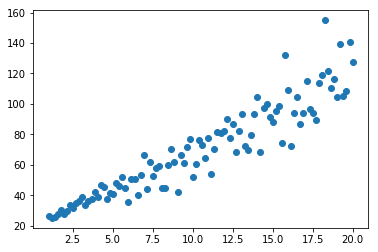

In [10]:
plt.scatter(X,y)

In [13]:
X = sm.add_constant(X)

In [14]:
X.shape

(100, 2)

In [15]:
X[:5]

array([[1.        , 1.        ],
       [1.        , 1.19191919],
       [1.        , 1.38383838],
       [1.        , 1.57575758],
       [1.        , 1.76767677]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.shape

(67, 2)

In [19]:
X_test.shape

(33, 2)

In [20]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     266.2
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.14e-24
Time:                        13:15:08   Log-Likelihood:                -261.71
No. Observations:                  67   AIC:                             527.4
Df Residuals:                      65   BIC:                             531.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4982      3.257      7.214      0.000      16.993      30.003
x1             4.3932      0.269     16.316      0.000       3.855       4.931
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.015
Skew:                           0.026   Prob(JB):                        0.992
Kurtosis:                       2.948   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
results.params

array([23.49822797,  4.393224  ])

In [29]:
#Predicted results
y_hat =results.predict(X_test)
y_hat[:5]

array([97.87240401, 72.578084  , 86.91153201, 65.832932  , 64.98978799])

In [30]:
# actual results
y_test[:5]

[74.54317734493611,
 63.00724166955317,
 85.36085343868754,
 59.446255183341584,
 75.93961676217643]

In [31]:
r2_score(y_test, y_hat)

0.8557832917117888

Text(0.5,1,'actual vs predicted')

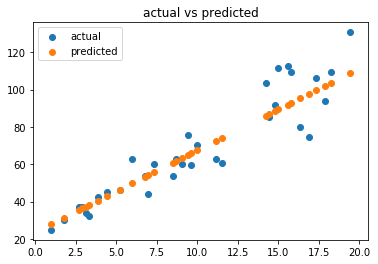

In [35]:
plt.scatter(X_test[:,1], y_test, label ='actual')
plt.scatter(X_test[:,1], y_hat, label ='predicted')
plt.legend()
plt.legend()
plt.title('actual vs predicted')